## Pre-requisites

In [306]:
import numpy as np 

In [312]:
N = 80
x = np.random.randint(2, size=[N, N], dtype=int) 
            # the matrix of certificates 
            # x[i,j] = 1 iff same color, else 0
# x[i,j] == x[j,i] by definition i.e. 
# the matrix is symmetric again ! 
x = (x + x.T)//2
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

## Defining the Hamiltonian

In [308]:
def hamiltonian(state): 
    """Returns the hamiltonian of the current state 

    Args:
        x (np.array(int)): the matrix of certificates that describes the current

    Returns:
        (int): the value of the hamiltonian for the given state 
    """
    ham_sum = 0; 
    for i in range(N): 
        for j in range(N - i): 
            if i == j: 
                continue 
            ham_sum = ham_sum + state[i,j]*x[i,i+j] * (2*N - np.abs(i-j))
            #x[i,j]*x[i,i+j] #+ x[i,j]*x[j,i+j] 
    return ham_sum

In [309]:
print( hamiltonian(x) )

2965


## Simulated Annealing solution

In [310]:
def simulated_annealing(init_state, temp=100, cost=hamiltonian):
    best = init_state.copy()
    best_cost = cost(best)
    curr, curr_cost = best.copy(), best_cost 
    T = temp; 
    while T > 1e-3: 
        # Evolve the solution randomly 
        for _ in range(5):
            i,j = np.random.randint(N, size=[2,1]);
            i, j = int(i), int(j)
            curr[i][j] = (1 + curr[i][j]) % 2
            curr[j][i] = (1 + curr[j][i]) % 2

        curr_cost = hamiltonian(curr)
        if (curr_cost < best_cost) \
            or (np.random.random() < np.exp(-(curr_cost - best_cost)/T)): 
            best, best_cost = curr, curr_cost
        T = T * 0.90
    
    return best, best_cost


In [313]:
solution, sol_cost = simulated_annealing(x)
base_cost = hamiltonian(x)
print(f'Solution cost: {sol_cost} vs. original cost: {base_cost}')
print(f'with a %gain/loss of {100*(sol_cost - base_cost)/base_cost}%')
solution

Solution cost: 31417 vs. original cost: 31439
with a %gain/loss of -0.06997678043194758%


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1]], dtype=int32)

# Percentage reduction of costs

In [265]:
import matplotlib.pyplot as plt 

In [274]:
sol = {}; sol_costs = {}
base = {}; base_costs = {}
temp = 0 
for nN in range(10, 200, 25):
    temp = np.random.randint(2, size=[nN, nN], dtype=int) 
    temp = (temp + temp.T)//2
    base[nN] = temp; 
    base_costs[nN] = hamiltonian(temp); 
    sol[nN], sol_costs[nN] = simulated_annealing(temp)
print('Solution: ', sol_costs)
print('Base: ', base_costs)

Solution:  {10: 48, 35: 75, 60: 65, 85: 83, 110: 54, 135: 77, 160: 56, 185: 79}
Base:  {10: 29, 35: 124, 60: 42, 85: 79, 110: 36, 135: 135, 160: 79, 185: 108}


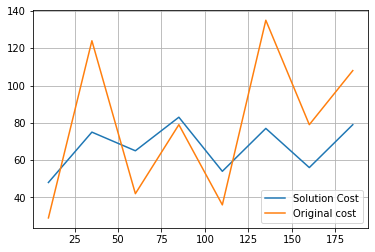

In [275]:
list_sol = sorted(sol_costs.items())
sx, sy = zip(*list_sol)
plt.plot(sx, sy, label='s')
list_base = sorted(base_costs.items())
bx, by = zip(*list_base)
plt.plot(bx, by, label='b')
plt.legend(['Solution Cost', 'Original cost'])
plt.grid()
plt.show()

Text(0.5, 1.0, 'Percentage gain')

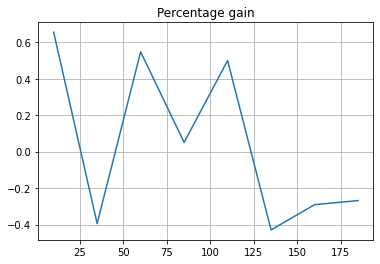

In [276]:
percentage_gain = [ (sy[i] - by[i])/by[i] for i in range(len(by))]
percentage_gain
plt.plot(bx , percentage_gain)
plt.grid()
plt.title('Percentage gain')

In [269]:
def decode(x): 
    list_colors = {1: 1}
    for number in range(1, N): # already assigned the first model 
        pass 